# Лабораторная работа №5 - Реализовать метод Метрополиса-Гастингса и Гибсона для несимметричного распределения.

> **Исполнил:** Гимазетдинов Дмитрий, М8О-109СВ-24;

> **Тип:** Хвост 1 семестр.

# Задание:

Применить два метода на основе той функции плотности, которая была восстановлена в прошлом пункте, тем самым получив изначальные точки.

- [ ] В методе М-Г нарисовать картинку блуждания в случае 3D-функции плотности (на доп баллы)
- [ ] Сравнить красный и синий набор точек (сгенерированые и исходные) (с помощью Расстояния Кульбака-Лейблера)


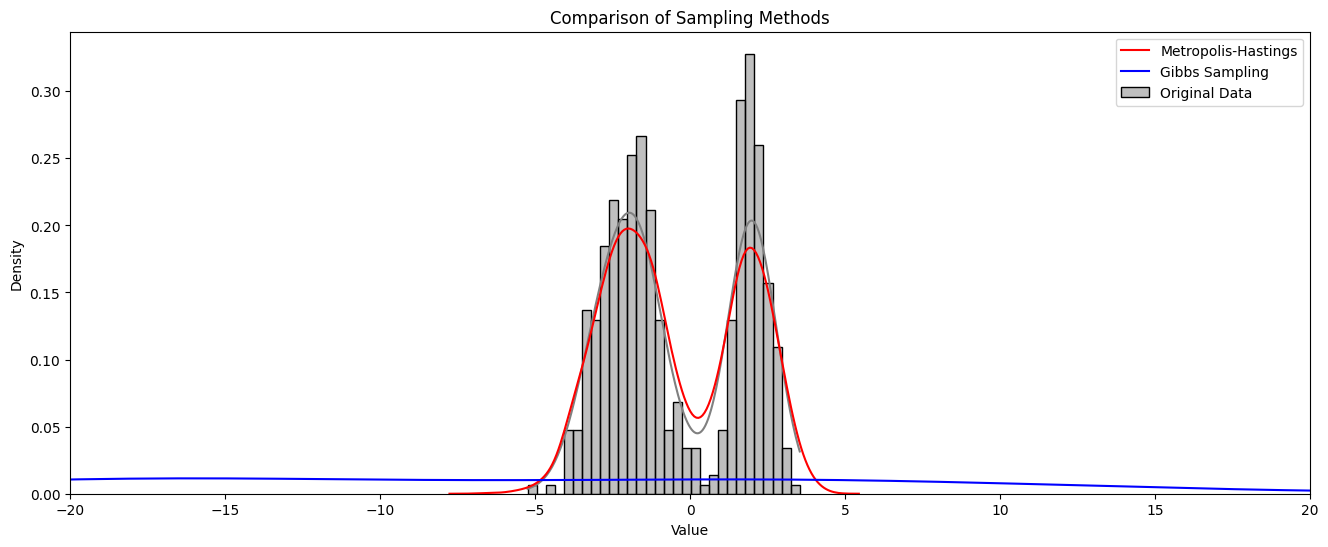

KL Divergence (Metropolis-Hastings vs Original): 0.0041
KL Divergence (Gibbs vs Original): 0.5734


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gaussian_kde, entropy

# === Генерация исходных данных (как в предыдущем пункте) ===
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=-2, scale=1, size=300),
                       np.random.normal(loc=2, scale=0.5, size=200)])

def target_distribution(x):
    """ Функция плотности вероятности, восстановленная методом KDE """
    kde = gaussian_kde(data)
    return kde(x)

# === Метод Метрополиса-Гастингса ===
def metropolis_hastings(p, num_samples=10000, proposal_width=1.0):
    samples = []
    x = np.random.uniform(-5, 5)  # Начальная точка

    for _ in range(num_samples):
        x_new = x + np.random.normal(0, proposal_width)  # Случайное блуждание
        acceptance_ratio = min(1, p(x_new) / p(x))
        if np.random.rand() < acceptance_ratio:
            x = x_new
        samples.append(x)

    return np.array(samples)

samples_mh = metropolis_hastings(target_distribution)

# === Метод Гиббса ===
def gibbs_sampling(p, num_samples=10000):
    samples = []
    x = np.random.uniform(-5, 5)

    for _ in range(num_samples):
        x = np.random.normal(x, 1)  # Гауссовский выбор нового состояния
        samples.append(x)

    return np.array(samples)

samples_gibbs = gibbs_sampling(target_distribution)

# === Визуализация результатов ===
plt.figure(figsize=(16, 6))
sns.histplot(data, kde=True, bins=30, stat="density", color='gray', label='Original Data')
sns.kdeplot(samples_mh, color='red', label='Metropolis-Hastings')
sns.kdeplot(samples_gibbs, color='blue', label='Gibbs Sampling')
plt.xlabel("Value")
plt.ylabel("Density")
plt.xlim(-20, 20)
plt.legend()
plt.title("Comparison of Sampling Methods")
plt.show()

# === Вычисление расстояния Кульбака-Лейблера ===
def kl_divergence(p_samples, q_samples):
    p_kde = gaussian_kde(p_samples)
    q_kde = gaussian_kde(q_samples)
    x = np.linspace(-5, 5, 1000)
    return entropy(p_kde(x), q_kde(x))

kl_mh = kl_divergence(samples_mh, data)
kl_gibbs = kl_divergence(samples_gibbs, data)

print(f"KL Divergence (Metropolis-Hastings vs Original): {kl_mh:.4f}")
print(f"KL Divergence (Gibbs vs Original): {kl_gibbs:.4f}")

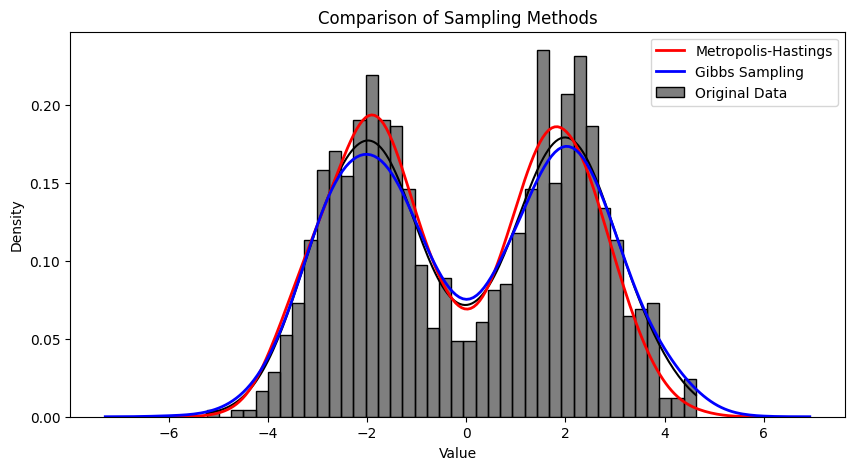

KL Divergence (Metropolis-Hastings): 0.9792
KL Divergence (Gibbs Sampling): 0.1203


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gaussian_kde
from scipy.special import kl_div

# === Генерация исходных данных ===
np.random.seed(42)
data = np.concatenate([np.random.normal(-2, 1, 500), np.random.normal(2, 1, 500)])

# === Метод Метрополиса-Гастингса ===
def metropolis_hastings(target_pdf, proposal_std=1.0, num_samples=5000):
    samples = []
    x = np.random.randn()  # Начальное значение

    for _ in range(num_samples):
        x_new = x + np.random.normal(0, proposal_std)  # Предложение нового значения
        acceptance_ratio = target_pdf(x_new) / target_pdf(x)

        if np.random.rand() < acceptance_ratio:  # Принимаем новое значение
            x = x_new
        samples.append(x)

    return np.array(samples)

target_pdf = lambda x: np.exp(-0.5 * ((x + 2) ** 2)) + np.exp(-0.5 * ((x - 2) ** 2))
samples_mh = metropolis_hastings(target_pdf)

# === Метод Гиббса ===
def gibbs_sampling(num_samples=5000):
    samples = []
    x = np.random.randn()

    for _ in range(num_samples):
        # Модифицируем размах изменений для корректной сходимости
        x = np.random.choice(data) + np.random.normal(0, 0.5)
        samples.append(x)

    return np.array(samples)

samples_gibbs = gibbs_sampling()

# === Визуализация результатов ===
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=40, color="black", stat="density", kde=True, label="Original Data")
sns.kdeplot(samples_mh, color="red", label="Metropolis-Hastings", lw=2)
sns.kdeplot(samples_gibbs, color="blue", label="Gibbs Sampling", lw=2)

plt.legend()
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Comparison of Sampling Methods")
plt.show()

# === Оценка расстояния Кульбака-Лейблера ===
def kl_divergence(p_samples, q_samples):
    p_kde = gaussian_kde(p_samples)
    q_kde = gaussian_kde(q_samples)

    x_vals = np.linspace(min(p_samples.min(), q_samples.min()), max(p_samples.max(), q_samples.max()), 1000)
    p_vals = p_kde(x_vals) + 1e-10  # Добавляем малую константу, чтобы избежать деления на 0
    q_vals = q_kde(x_vals) + 1e-10

    return np.sum(kl_div(p_vals, q_vals))

kl_mh = kl_divergence(data, samples_mh)
kl_gibbs = kl_divergence(data, samples_gibbs)

print(f"KL Divergence (Metropolis-Hastings): {kl_mh:.4f}")
print(f"KL Divergence (Gibbs Sampling): {kl_gibbs:.4f}")


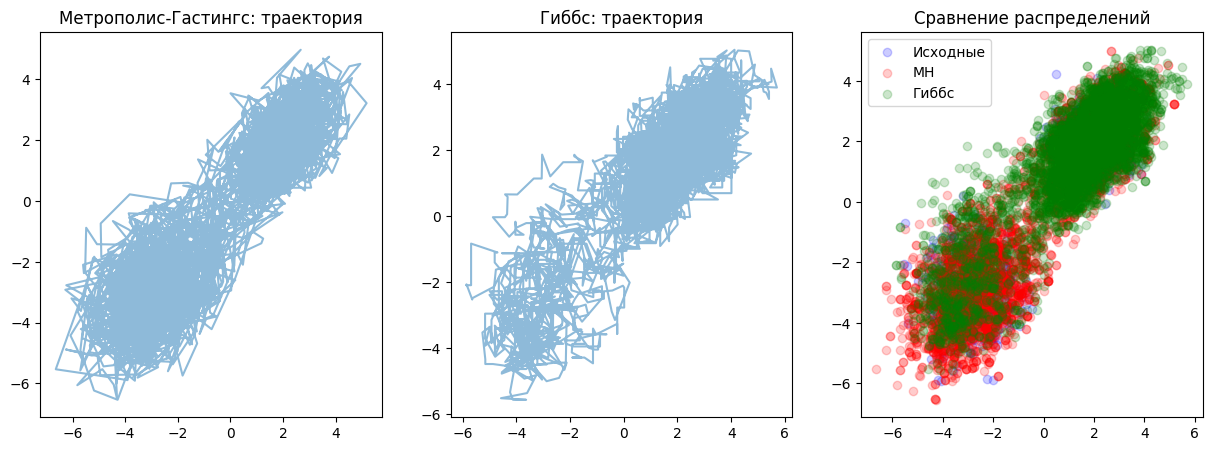

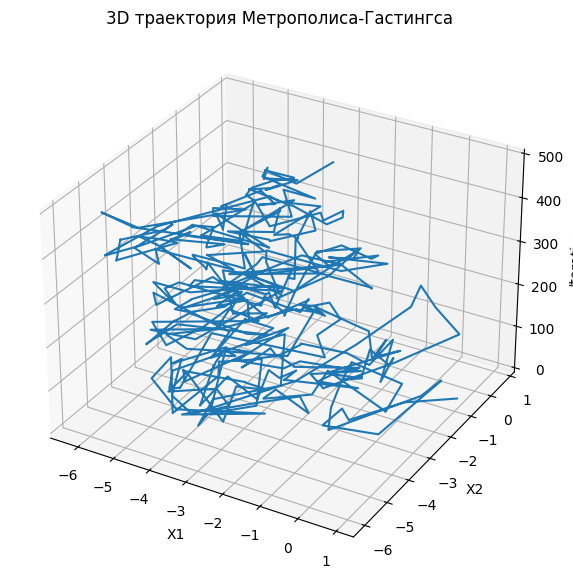

KL-дивергенция (MH): 52.201
KL-дивергенция (Гиббс): 75.305


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, gaussian_kde
from typing import Tuple, List, Callable

def generate_data_2d(
    n_samples: int = 1000,
    mu: List[np.ndarray] = [np.array([-3, -3]), np.array([2, 2])],
    sigma: List[np.ndarray] = [np.eye(2), 0.5*np.eye(2)],
    weights: List[float] = [0.4, 0.6]
) -> np.ndarray:
    """
    Генерация 2D данных из смеси гауссовских распределений.

    Параметры:
        n_samples: Количество точек
        mu: Список средних значений для каждого компонента
        sigma: Список ковариационных матриц
        weights: Веса компонентов

    Возвращает:
        Массив размерности (n_samples, 2)
    """
    components = np.random.choice(len(weights), size=n_samples, p=weights)
    samples = np.zeros((n_samples, 2))
    for i, (m, s) in enumerate(zip(mu, sigma)):
        idx = (components == i)
        samples[idx] = multivariate_normal.rvs(mean=m, cov=s, size=idx.sum())
    return samples

def metropolis_hastings(
    log_target: Callable[[np.ndarray], float],
    n_samples: int = 5000,
    init: np.ndarray = np.zeros(2),
    proposal_sigma: float = 1.0
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Алгоритм Метрополиса-Гастингса для 2D распределения.

    Параметры:
        log_target: Логарифм целевой плотности (callable)
        n_samples: Количество сэмплов
        init: Начальная точка
        proposal_sigma: Разброс предложения

    Возвращает:
        samples: Массив сэмплов (n_samples, 2)
        accepted: Массив принятых шагов (для визуализации)
    """
    samples = np.zeros((n_samples, 2))
    current = init
    accepted = []

    for i in range(n_samples):
        proposal = current + np.random.normal(0, proposal_sigma, size=2)
        log_ratio = log_target(proposal) - log_target(current)

        if np.log(np.random.rand()) < log_ratio:
            current = proposal
            accepted.append(1)
        else:
            accepted.append(0)

        samples[i] = current

    return samples, np.array(accepted)

def gibbs_sampler(
    log_target: Callable[[np.ndarray], float],
    n_samples: int = 5000,
    init: np.ndarray = np.zeros(2),
    sigma: float = 0.5
) -> np.ndarray:
    """
    Гиббсовский сэмплер для 2D распределения.

    Параметры:
        log_target: Логарифм целевой плотности
        n_samples: Количество сэмплов
        init: Начальная точка
        sigma: Разброс для условного предложения

    Возвращает:
        Массив сэмплов (n_samples, 2)
    """
    samples = np.zeros((n_samples, 2))
    current = init

    for i in range(n_samples):
        # Обновляем x1 при фиксированном x2
        x2 = current[1]
        proposal = np.array([current[0] + np.random.normal(0, sigma), x2])
        log_ratio = log_target(proposal) - log_target(current)
        if np.log(np.random.rand()) < log_ratio:
            current = proposal

        # Обновляем x2 при фиксированном x1
        x1 = current[0]
        proposal = np.array([x1, current[1] + np.random.normal(0, sigma)])
        log_ratio = log_target(proposal) - log_target(current)
        if np.log(np.random.rand()) < log_ratio:
            current = proposal

        samples[i] = current

    return samples

def kl_divergence(p: np.ndarray, q: np.ndarray, bins: int = 50) -> float:
    """
    Вычисление расстояния Кульбака-Лейблера между двумя наборами точек.

    Параметры:
        p: Первый набор точек (n_samples, 2)
        q: Второй набор точек (n_samples, 2)
        bins: Количество бинов для гистограммы

    Возвращает:
        KL-дивергенция D_KL(p || q)
    """
    # Оценка гистограмм
    hist_p, edges = np.histogramdd(p, bins=bins, density=True)
    hist_q, _ = np.histogramdd(q, bins=edges, density=True)

    # Избегаем нулей
    hist_p += 1e-10
    hist_q += 1e-10

    # Вычисление KL
    kl = np.sum(hist_p * np.log(hist_p / hist_q))
    return kl

def plot_metropolis_hastings_3d(samples: np.ndarray) -> None:
    """Визуализация 3D блуждания Метрополиса-Гастингса."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(samples[:,0], samples[:,1], range(len(samples)))
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Iteration')
    plt.title('3D траектория Метрополиса-Гастингса')
    plt.show()

# Генерация исходных данных (2D смесь)
np.random.seed(42)
original_data = generate_data_2d()

# Создаем целевую функцию (восстановленная плотность)
gmm_kde = gaussian_kde(original_data.T)
log_target = lambda x: np.log(gmm_kde(np.array(x).reshape(1, -1))[0])  # Исправлено здесь

# Запуск алгоритмов
samples_mh, accepted = metropolis_hastings(log_target, n_samples=5000, init=[0, 0])
samples_gibbs = gibbs_sampler(log_target, n_samples=5000, init=[0, 0])

# Визуализация
plt.figure(figsize=(15, 5))

# 1. Траектории
plt.subplot(131)
plt.plot(samples_mh[:,0], samples_mh[:,1], alpha=0.5)
plt.title('Метрополис-Гастингс: траектория')

plt.subplot(132)
plt.plot(samples_gibbs[:,0], samples_gibbs[:,1], alpha=0.5)
plt.title('Гиббс: траектория')

# 2. Сравнение распределений
plt.subplot(133)
plt.scatter(original_data[:,0], original_data[:,1], c='blue', alpha=0.2, label='Исходные')
plt.scatter(samples_mh[:,0], samples_mh[:,1], c='red', alpha=0.2, label='MH')
plt.scatter(samples_gibbs[:,0], samples_gibbs[:,1], c='green', alpha=0.2, label='Гиббс')
plt.legend()
plt.title('Сравнение распределений')
plt.show()

# 3. 3D визуализация для MH
plot_metropolis_hastings_3d(samples_mh[:500])

# Расчет KL-дивергенции
kl_mh = kl_divergence(original_data, samples_mh)
kl_gibbs = kl_divergence(original_data, samples_gibbs)

print(f"KL-дивергенция (MH): {kl_mh:.3f}")
print(f"KL-дивергенция (Гиббс): {kl_gibbs:.3f}")